# <center> Guia 4 </center>
Alumnes: Borrel Trinidad, Brusco Agustín

Docentes: Rodriguez Imazio Paola, Amette Estrada Julian

## Imports Generales
Ejecutar la siguiente celda para poder correr el código del Notebook.

In [1]:
import sys
import os
# Colab Set-Up
if ("google.colab" in sys.modules) and (os.getcwd() == '/content'):
    print(
        "Ejecutando en Google Colab\n"
        "Para correr el notebook se necesita clonar un repositorio con funciones "
        "auxiliares e instalar librerías."
    )
    if input(
        "¿Desea clonar el repositorio e instalar los paquetes necesarios?"
        "[y/n]:"
    ).lower() == "y":
        os.system("git clone https://github.com/agustinbrusco/Sistemas_Complejos.git")
        print(
            "Se clonó https://github.com/agustinbrusco/Sistemas_Complejos.git."
        )
        os.chdir("Sistemas_Complejos/guias/")
        %pip install findiff
        %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

# Imports Generales
from typing import Callable
import numpy as np
from numpy.typing import ArrayLike
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Matplotlib settings
%config InlineBackend.figure_format = "retina"  # For high dpi figures in notebook
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["figure.dpi"] = 120
plt.rcParams["legend.fontsize"] = "medium"
plt.rcParams["axes.labelsize"] = "large"

from utils import (plot_3d_evolution)

# Ecuación Korteweg-de-Vries(KdV)

La ecuación KdV es una ecuación diferencial en derivadas parciales que sirve como modelo de, entre otras cosas, aguas poco profundas. Fue por primera vez introducida por Boussinesq en 1877 como una nota y redescubierta por Diederik Korteweg y Gustav de Vries en 1895. Esta está dada por la expresión,

$$ \partial_t u + u u_x + \beta \, u_{xxx} = 0 $$



$\bf a)$ Pruebe analíticamente la conservación del momento $P = \int u dx$ y  de la energía $E = \int u^2 dx$.

$\bf b)$ Notando que el estado estacionario es con $u$ constante, calcule la relación de dispersión de ondas linealizando. ¿Qué tipo de ondas son las que encuentra?  


$\bf c)$ Busque la solución de ondas viajeras $u(x-vt) = u (y)$. Para eso, primero note que $u_t = -v u_t$. Escriba el sistema como una ecuación de segundo orden integrando (Note que la presencia de una simetría $v \rightarrow v + w$ y $u \rightarrow u + w$ antes de integrar permite anular la constante de integración), realice una analogía con una ecuación del movimiento como las que conoce de mecánica newtoniana ($\ddot{x} = - \frac{dV}{dx}$, interprete el tiempo como $x$ y el espacio como $u$) e interprete (grafique el potencial para hacerlo). Discuta la existencia de un único soliton y de un trén de solitones.

$\bf d)$ Escriba un integrador con método pseudoespectral para la ecuación KdV usando Runge-Kutta de orden 2 midpoint para el paso temporal. Hágalo en un recinto de tamaño $2  \ pi$ con condiciones de contorno periódicas y $N = 128$ puntos de grilla. Note que el término $\beta u_{xxx}$, en caso ser dominante exige $dt < \frac{\Delta x^3}{\beta}$. (puede usar un N mayor cuidando el dt para que se cumpla la condición de estabilidad)

$\bf e)$ Sabiendo que la expresión de un solitón está dada por:

$$ u(x,t) = 3 \, v \, \text{cosh}^{-2} \left[ \sqrt{\frac{v}{4 \beta}} (x  - v t) \right]$$

coloque un solitón como condición inicial, calcule su velocidad en función del tiempo y compare con lo que espera. Escriba una condición de dos solitones, uno rápido y uno lento. ¿Se afectan el uno al otro?

$\bf f)$ Del método de scattering inverso se encuentra que usando la transformación

$$ u  = - 6 \beta \left( \lambda + \frac{\psi_{xx}}{\psi}\right)$$

entonces $u$ será una solución de KdV si $\psi$ es solución de la ecuación de Schrödinger con un potencial $V = \frac{-u}{6 \beta}$. Dado el potencial, los lugares donde hayan pozos representan la existencia de estados ligados y resultarán en la emisión de solitones.

Elija una condición inicial, grafique el potencial y vea cómo se emiten solitones desde la zona esperada. Chequee las cantidades conservadas del comienzo.


(Sugerencia: Use $\beta = 0.022$ y $dt = 5e-5$ e integre por tiempo muy largos)

## a)

Si consideramos que $u u_x = \partial_x \left(\frac{u^2}{2}\right)$ podemos reescribir el segundo término de KdV y esta última queda
$$
\begin{equation}
    \partial_t u + \partial_x \left(\frac{u^2}{2} + \beta u_{xx} \right) = 0.                          
\end{equation}
$$
entonces, si consideramos que en nuestro problema tenemos un fluido o gas en un tubo de longitud $L$, integrando espacialmente sobre todo el tubo tenemos que

$$ \frac{\mathrm{d}}{\mathrm{d}t} \int_0^L u\, \mathrm{d}x = - \int_0^L \frac{\partial}{\partial x} \left( \frac{u^2}{2} + \beta u_{xx} \right)\, \mathrm{d}x = \left[ \frac{u^2}{2} + \beta u_{xx} \right]_0^L $$

Y para condiciones de contorno convenientes (con $u(0) = u(L)$ y $u_{xx}(0) = u_{xx} (L)$ ) se tiene que el resultado es nulo. Esto significa que se conserva el momento lineal globalmente.

Por otro lado, para ver la conservación de la energía comenzamos multiplicando a toda la expresión por $u$ y además usando que  $u\partial_t u = \partial_t (\frac{u^2}{2})$, entonces la expresión queda

$$ \partial_t \left(\frac{u^2}{2}\right) + u ∂_x \left(\frac{u^2}{2}\right) + u\beta u_{xxx} = 0$$

Notando que los primeros dos términos corresponden a la derivada convectiva, es decir $\mathrm{d}_t = \partial_t + u \partial_x$, entonces queda que

$$ \mathrm{d}_t \left(\frac{u^2}{2}\right) = - u\beta u_{xxx}$$

e integrando tenemos que espacialmente sobre el tubo de longitud $L$ tenemos que

$$ \frac{\mathrm{d}}{\mathrm{d}t} \int_0^L \frac{u^2}{2}\, \mathrm{d}x = - \int_0^L u \beta u_{xxx}\, \mathrm{d}x $$

donde aplicando partes tenemos que

$$ \frac{\mathrm{d}}{\mathrm{d}t} \int_0^L \frac{u^2}{2}\, \mathrm{d}x = - \beta \left[ u u_{xx} |_0^{L} - \int_0^L \partial_x \left(\frac{u_x}{2} \right)^2\, \mathrm{d}x \right] =  - \beta \left[ u u_{xx}  - \left(\frac{u_x}{2} \right)^2 \right]_0^{L}$$

así, pidiendo las condiciones de contorno adecuadas (las mismas que para la conservación de $P$ y además que $|u_{x}(0)| = |u_{x} (L)|$ ) se comprueba la conservación de la energía.

## b)

Empezamos considerando que $u(x,t) = u_0 + \delta u(x,t) → u = u_0 + \delta u$. Reemplazamos esto en KdV y entonces tenemos que

$$ \partial_t \delta u + (u_0 + \delta u) \partial_x \delta u + \beta \, \delta u_{xxx} = 0 $$

y quedandonos con términos $\mathcal{O} (\delta u)$ nos queda la siguiente expresión.

$$ \partial_t \delta u + u_0  \partial_x \delta u + \beta \, \delta u_{xxx} = 0 $$

y proponiendo una solución de onda viajera $\delta u = \mathcal{C} e^{i(kx - \omega t)}$ llegamos a la expresión de la relación de dispersión

$$ \omega = u_0 k - \beta k^3$$

donde el primer término se corresponde a una solución de ondas no dispersivas mientras que el segundo término se corresponde a una solución de ondas dispersivas.


## c)

Si proponemos soluciones de onda viajera del tipo $u(x-vt) = u(y)$, entonces tenemos que se defininen las derivadas parciales de la siguiente forma

$$\partial_t u (x - vt) = -v u'(y) $$
$$\partial_x u (x - vt) = u'(y)$$

Entonces, usando estas equivalencias podemos reescribir KdV, quedandonos la siguiente expresión

$$ -vu'(y) + \frac{\mathrm{d}}{\mathrm{d}y}\left(\frac{u^2}{2}\right) + \beta \, u'''(y) = 0 $$

donde reordenando tenemos que 

$$  \frac{\mathrm{d}}{\mathrm{d}y}\left(-vu(y) + \frac{u^2(y)}{2}+ \beta \, u^{\prime \prime}\right)  = 0$$

e integrando tenemos que

$$ \beta u^{\prime \prime} = vu - \frac{u^2}{2} = - \frac{\mathrm{d}V}{\mathrm{d}u}$$

dónde $V = -v\frac{u^2}{2} + \frac{u^3}{6}$ es el potencial. Se puede ver a continuación en el gráfico a izquierda la forme $V(u)$ para distintos valores de $v$.

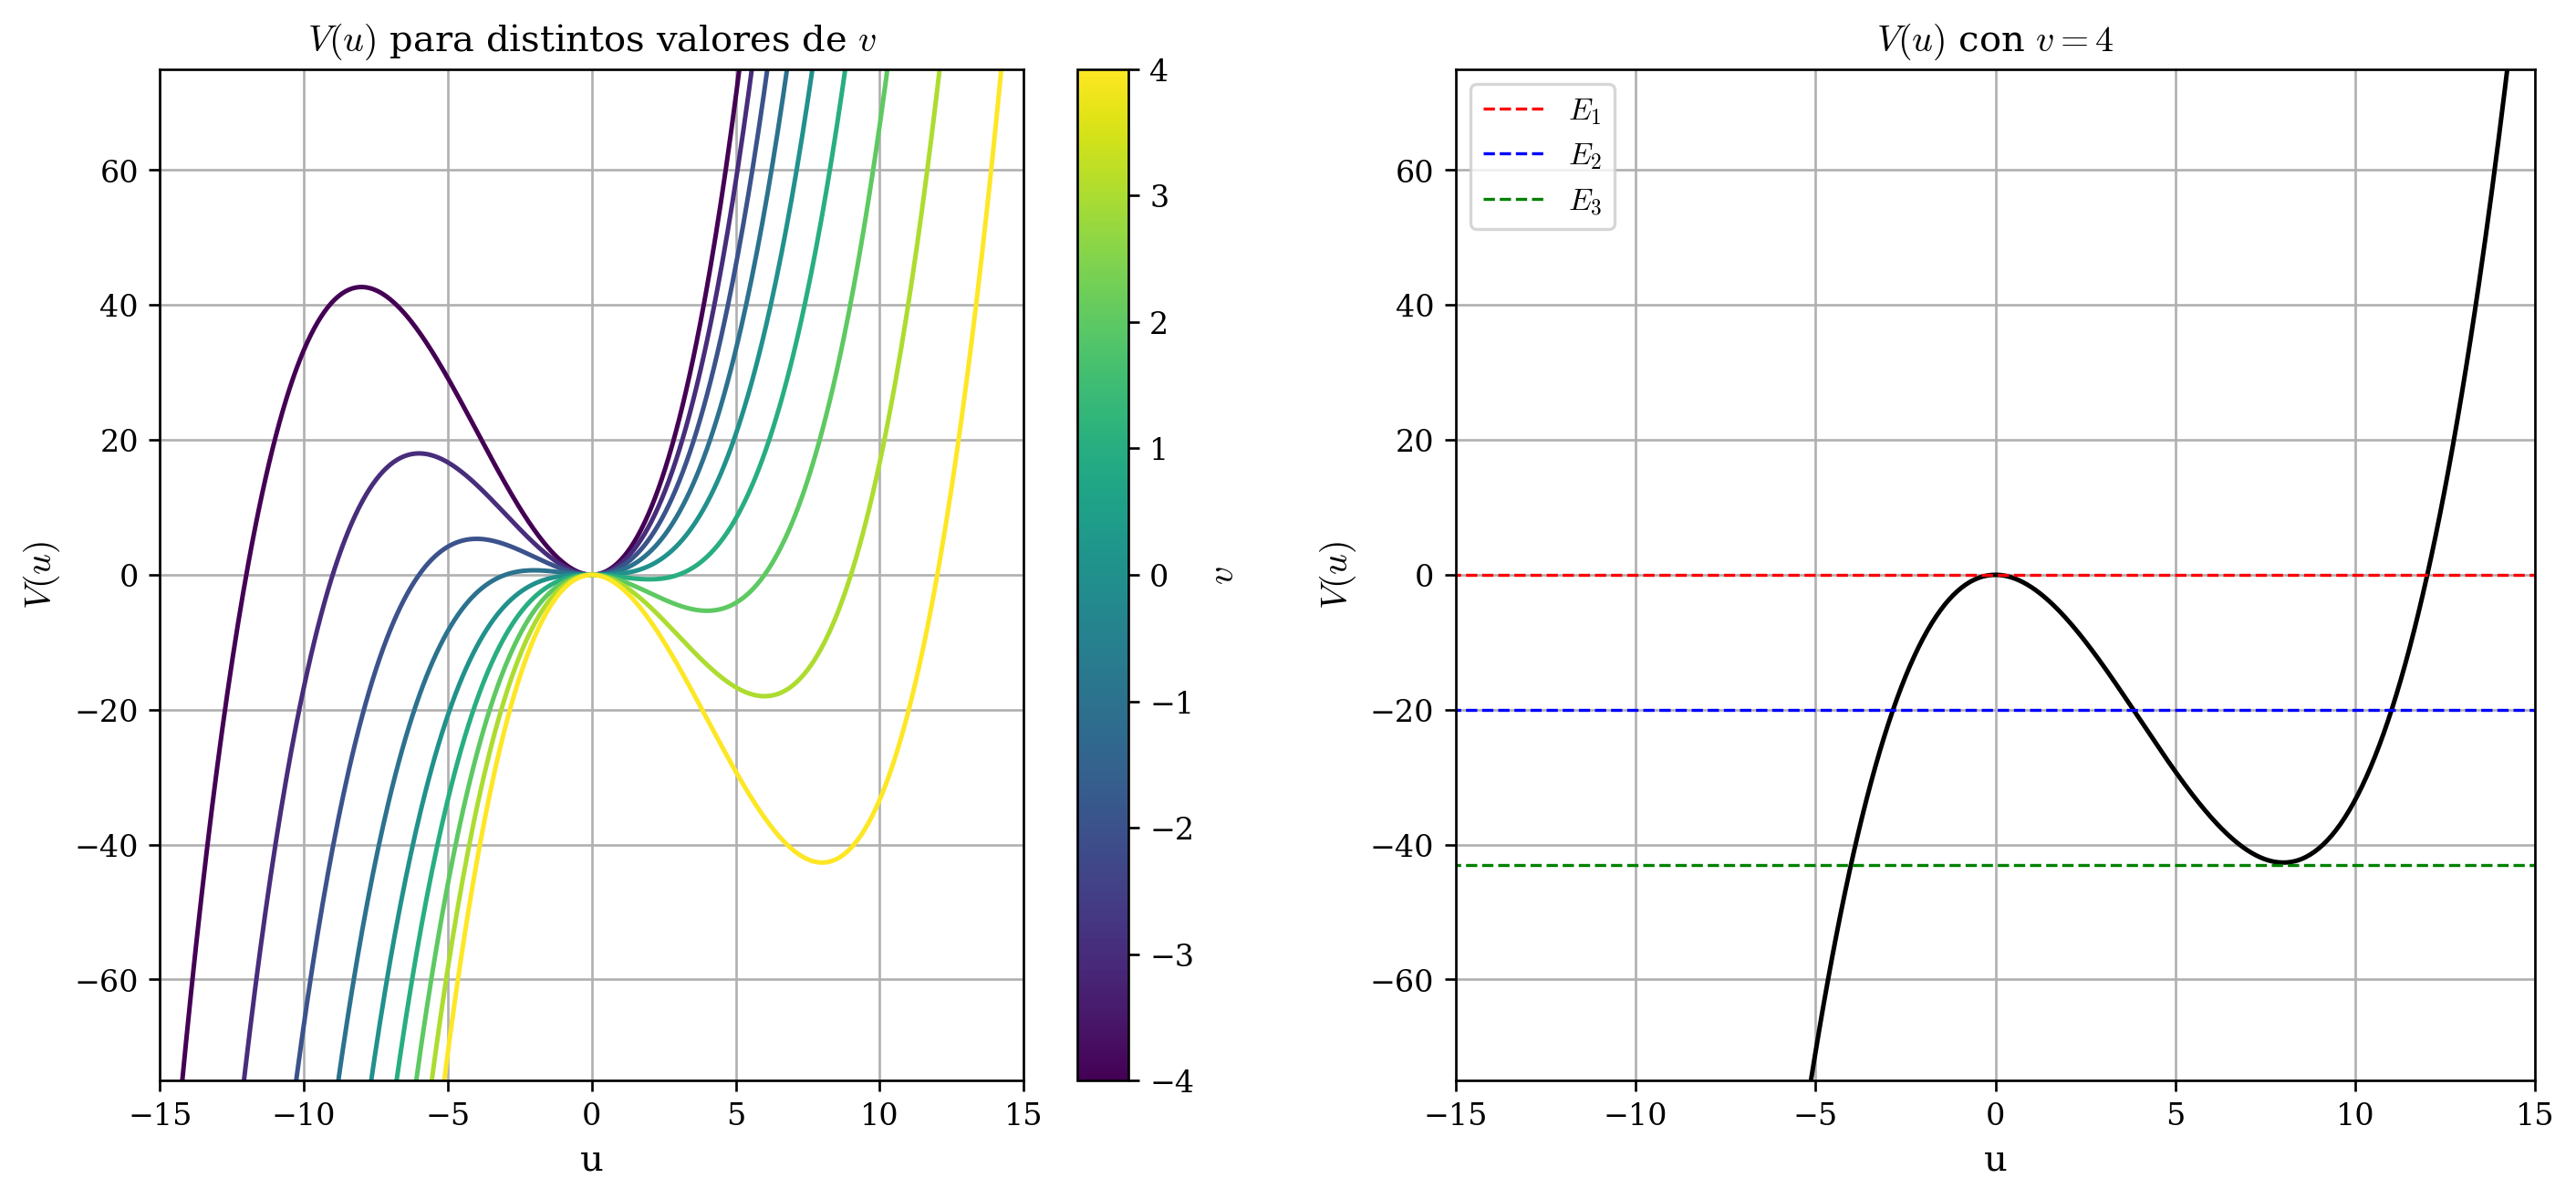

In [2]:
def potencial_kdv(u: ArrayLike, v: float) -> ArrayLike:
    return -v*(u**2)/2 + (u**3)/6

u_vals = np.linspace(-15, 15, 500)
v_vals = np.arange(-4, 5, 1)
colors = plt.cm.ScalarMappable(norm=plt.Normalize(v_vals[0], v_vals[-1],), cmap="viridis")
fig, axs = plt.subplots(ncols = 2,  figsize = (14,6))

for v in v_vals:
    axs[0].plot(u_vals, potencial_kdv(u_vals, v), c=colors.to_rgba(v), label=f"$v={v}$")
axs[0].set_title("$V(u)$ para distintos valores de $v$")
axs[0].grid(True)
axs[0].set_xlabel('u')
axs[0].set_ylabel('$V(u)$')
axs[0].set_xlim(u_vals[0], u_vals[-1])
axs[0].set_ylim(-75, 75)
plt.colorbar(colors, label="$v$", ax=axs[0])

axs[1].plot(u_vals, potencial_kdv(u_vals, 4), c='k')
axs[1].set_title("$V(u)$ con $v = 4$")
axs[1].grid(True)
axs[1].set_xlabel('u')
axs[1].set_ylabel('$V(u)$')
axs[1].axhline(y = 0, xmin=min(u_vals), xmax = max(u_vals), ls = '--', lw = 1, color = 'red', label = '$E_1$')
axs[1].axhline(y = -20, xmin=min(u_vals), xmax = max(u_vals), ls = '--', lw = 1, color = 'blue', label = '$E_2$')
axs[1].axhline(y = -43, xmin=min(u_vals), xmax = max(u_vals), ls = '--', lw = 1, color = 'green', label = '$E_3$')
axs[1].legend()
axs[1].set_xlim(u_vals[0], u_vals[-1])
axs[1].set_ylim(-75, 75)

plt.show()

Observando la figura a izquierda, donde se consideraron valores de $v$ enteros en el conjunto $[-4, 4]$, se concluye que siempre que $v \neq 0$ el potencial tendrá un valle con un mínimo y máximo locales bien definidos. Considerando el correlato con mecánica newtoniana se interpreta que las energías que se encuentren entre el mínimo y máximo local se corresponden con órbitas cerradas, mientras que las energías que se encuentren entre $+ \infty$ hasta el máximo local y entre $- \infty$ hasta el mínimo local se corresponden con órbitas abiertas. Estas últimas no tienen interpretación física ya que sus soluciones cuentan energía infinita. 
Por otro lado, observando la figura a derecha, se puede hacer un análisis de las soluciones de órbitas cerradas. Para $E_1$ se tiene que la energía será la correspondiente a la de un único soliton, donde en particular a esta órbita se la llama sepatariz, ya que es la que justamente separa las soluciones de órbitas cerradas de las abiertas. Para valores menores de energía, como $E_2$ se tiene que el sistema oscila, presentando varios solitones con una menor amplitud a la del único solitón mencionado anteriormente. Finalmente, para $E_3$ se tienen órbitas circulares, para las que se tienen $\infty$ solitones de amplitud tendiendo a $0$.

## d)

In [3]:
def evol(u: ArrayLike, k: ArrayLike, beta: float, dt: float):
    """Evoluciona en el tiempo la PDE usando el método pseudoespectral y \
Runge-Kutta de segundo orden.
    """
    u_hat = np.fft.rfft(u)  # Transformamos al espacio de Fourier
    u_hat_inicial = u_hat  # Guardamos el estado inicial
    for ord in [2,1]:  # Bucle para el Runge-Kutta
        D = dt/ord
        u_ux_hat = compute_advection(u_hat, k)
        u_hat = u_hat_inicial + D*(-u_ux_hat + 1j*beta*(k**3)*u_hat)  # Integramos en el tiempo
        u_hat[int(u.size/3):] = 0  # Dealiasing (eliminemos modos espúreos!)
    u_nuevo = np.fft.irfft(u_hat)  # Vuelva del espacio de Fourier
    return u_nuevo

def compute_advection(u_hat, k):
    """Calcula u*ux usando el método pseudoespectral y devuelve el resultado \
en el espacio Fourier.
    """
    ux_hat = 1j*k*u_hat  # Derivamos
    u = np.fft.irfft(u_hat)
    ux = np.fft.irfft(ux_hat)
    u_ux_hat = np.fft.rfft(u * ux)
    return u_ux_hat

In [4]:
# Defino mis puntos en el espacio real y los modos para el espacio de Fourier
nx = 128
L = 2 * np.pi
beta = 0.022
dt = 5e-5
tf = 5

x_vals = np.linspace(0, L, nx, endpoint=True)  # Coordenada espacial en [0,2*pi]
t_vals = np.arange(0, tf + dt/2, dt)  # Tiempo
nt = t_vals.size
# Números de onda ordenados como en la FFT
k_vals = np.fft.rfftfreq(nx, d=(x_vals[1] - x_vals[0])) * 2 * np.pi

# Grilla para plot
x_grid, t_grid = np.meshgrid(x_vals, t_vals, indexing="xy")  # Grilla para graficar

In [5]:
u = np.empty([nx, nt])  # Array con la velocidad
u[:, 0] = np.sin(2*x_vals)  # CI: senoidal pura
# u[:, 0] = np.cos(x_vals) + np.cos(8*x_vals) + np.sin(4*x_vals)  # CI: suma de armónicas
# u[:, 0] = np.exp(- (x_vals - L/2)**2 / 0.5**2)  # CI: gaussiana
# u[:, 0] = 0  # CI: constantemente cero

# Aplico el método de Euler para la integración temporal
for n in tqdm(range(nt - 1)):
    u[:, n+1] = evol(u[:, n], k_vals, beta, dt)

  0%|          | 0/100000 [00:00<?, ?it/s]

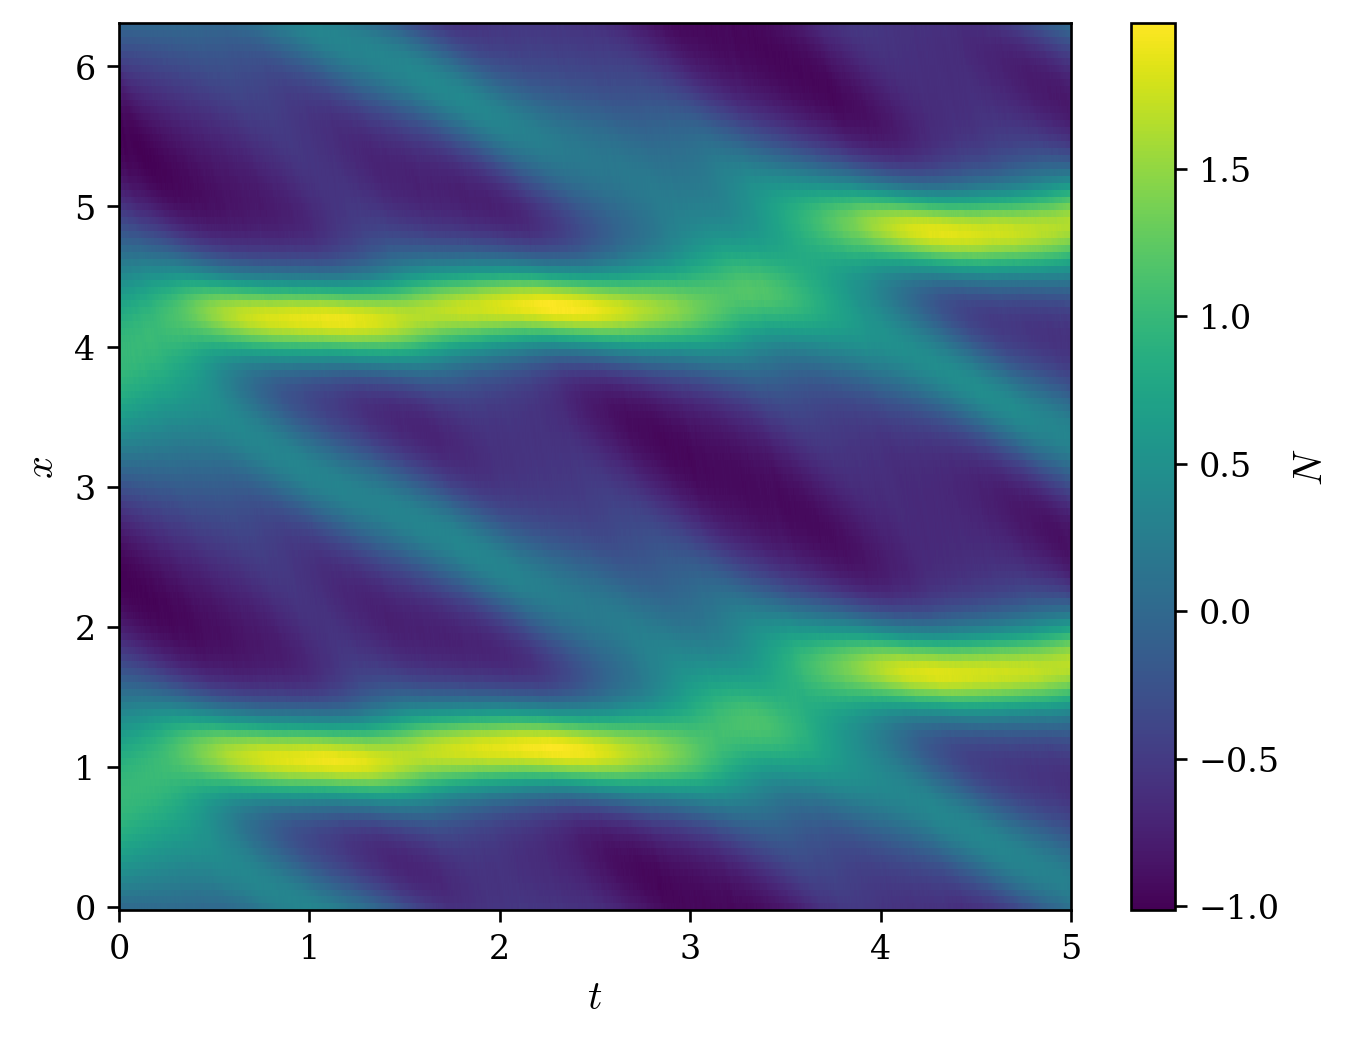

In [6]:
%matplotlib inline
plt.figure()
plt.pcolormesh(t_grid, x_grid, u.T, shading="auto", cmap="viridis")
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.colorbar(label="$N$")
plt.show()

In [ ]:
%matplotlib widget
fig, ax, v_cmap = plot_3d_evolution(x_vals, t_vals, u, cmap_name="viridis")
fig.set_label("Evolución de la Ecuación de Burgers mediante Método Pseudoespectral")
fig.suptitle(r"$u(x, 0) = \sin(x)$")
plt.show()

In [39]:
plt.close("all")

## e)

In [ ]:
def track_peaks(u: ArrayLike, **findpeakskwargs) -> tuple[ArrayLike, ArrayLike]:
    peaks_x = list()
    peaks_t = list()
    for i, u_i in tqdm(enumerate(u.T), total=u.T.shape[0]):
        peaks, _ = find_peaks(u_i, **findpeakskwargs)
        if (len(peaks_x) == 0) or (len(peaks) == len(peaks_x[-1])):
                peaks_x.append(x_vals[peaks])
                peaks_t.append(t_vals[i])
    peaks_x = np.array(peaks_x)
    peaks_t = np.array(peaks_t)
    return peaks_t, peaks_x

In [7]:
v = 0.5 * L / tf  # Velocidad de la onda, dos vueltas en el tiempo integrado
x0 = L/4
u = np.empty([nx, nt])  # Array con la velocidad
u[:, 0] = 3 * v * np.cosh(np.sqrt(v / (4 * beta)) * (x_vals - x0))**(-2)  # CI: solitón del ejercicio

# Aplico el método de Euler para la integración temporal
for n in tqdm(range(nt - 1)):
    u[:, n+1] = evol(u[:, n], k_vals, beta, dt)

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100001 [00:00<?, ?it/s]

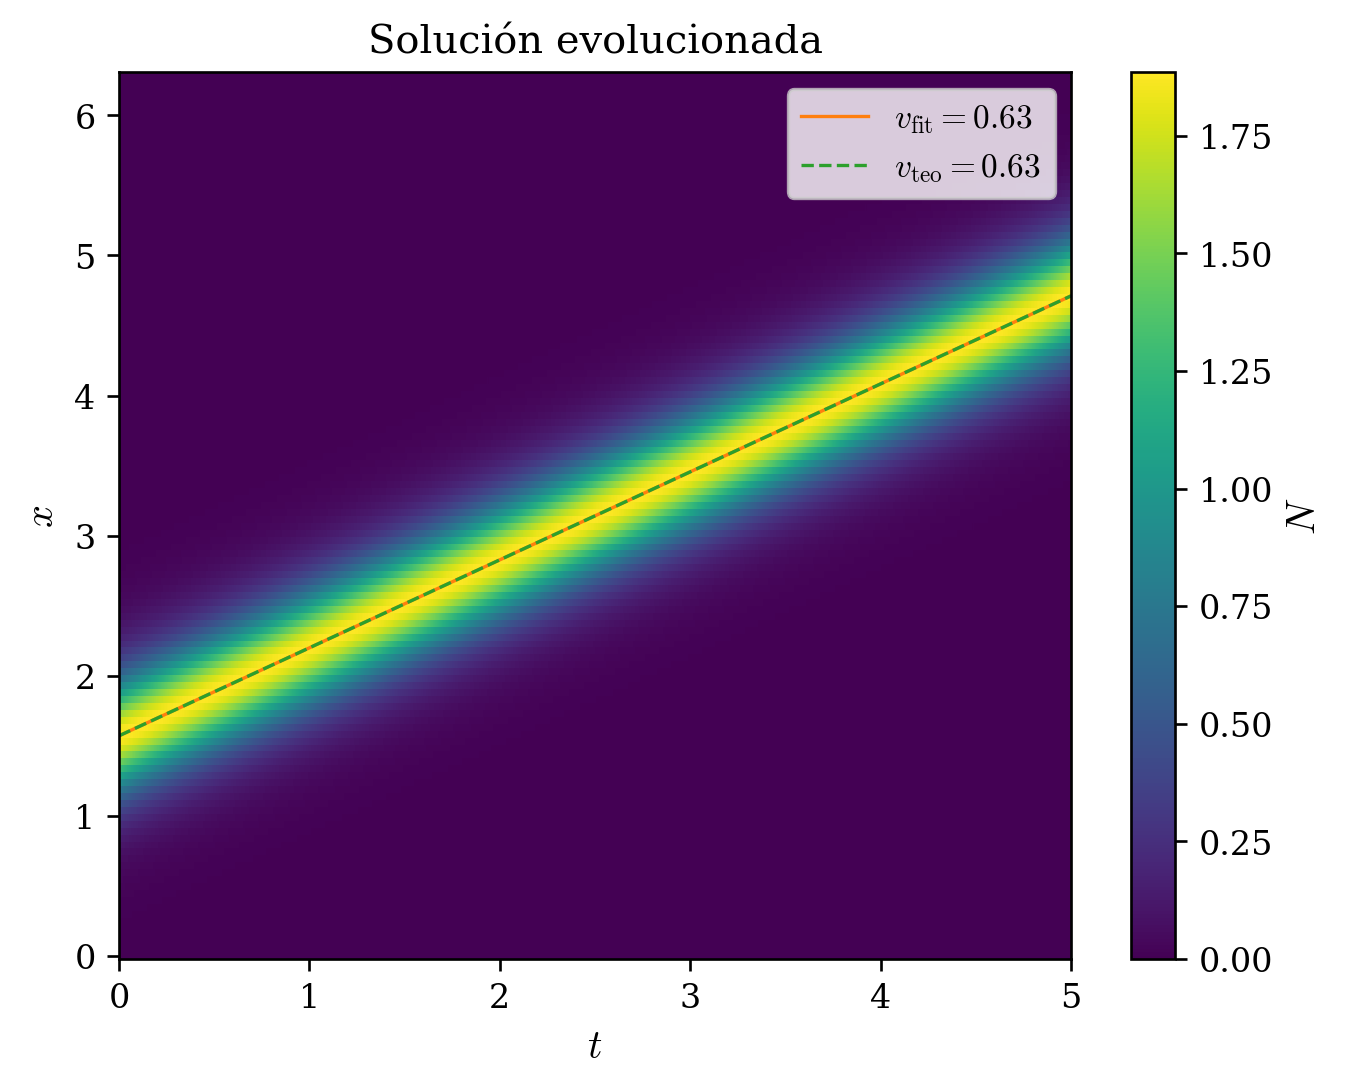

In [15]:
%matplotlib inline

peaks_t, peaks_x = track_peaks(u, height=0.8)

plt.figure()
plt.title("Solución evolucionada")
plt.pcolormesh(t_grid, x_grid, u.T, shading="auto", cmap="viridis")
# Peaks
# plt.plot(peaks_t, peaks_x, 'k.', ms=2)
params, params_cov = curve_fit(lambda t, a, b: a*t + b, peaks_t, peaks_x.flatten())
plt.plot(t_vals, params[0]*t_vals + params[1], "C1-", lw=1,
         label=r"$v_\mathrm{fit}"+f"={params[0]:.2f}$")
plt.plot(t_vals, v*t_vals + x0, "C2--", lw=1, label=r"$v_\mathrm{teo}"+f"={v:.2f}$")

plt.legend()
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.colorbar(label="$u$")
plt.show()

In [16]:
# %matplotlib inline
# u_teo = 3 * v * np.cosh(np.sqrt(v / (4 * beta)) * (x_grid - x0 - v * t_grid))**(-2)
# u_teo = u_teo.T
# plt.figure()
# plt.pcolormesh(t_grid, x_grid, u_teo.T, shading="auto", cmap="viridis")
# plt.xlabel("$t$")
# plt.ylabel("$x$")
# plt.colorbar(label="$N$")
# plt.show()

In [ ]:
%matplotlib widget
fig, ax, v_cmap = plot_3d_evolution(x_vals, t_vals, u, cmap_name="viridis")
fig.set_label("Evolución de KdV mediante Método Pseudoespectral")
fig.suptitle(r"$u(x, 0) = 3 v \cosh^{-2} \left[ \sqrt{\frac{v}{4 \beta}} (x  - L/2) \right]$")
plt.show()

In [17]:
plt.close("all")

Ahora evolucionamos dos solitones con diferentes velocidades:

In [18]:
v1 = 0.5 * L / (1.5 * tf)  # Velocidad de la onda, dos vueltas en el tiempo integrado
x1 = L/2
v2 = 1. * L / (1.5 * tf)
x2 = L/6
u = np.empty([nx, nt])  # Array con la velocidad
u[:, 0] = (  # CI: dos solitones del ejercicio
    3 * v1 * np.cosh(np.sqrt(v1 / (4 * beta)) * (x_vals - x1))**(-2)
    + 3 * v2 * np.cosh(np.sqrt(v2 / (4 * beta)) * (x_vals - x2))**(-2)
)
# Aplico el método de Euler para la integración temporal
for n in tqdm(range(nt - 1)):
    u[:, n+1] = evol(u[:, n], k_vals, beta, dt)

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100001 [00:00<?, ?it/s]

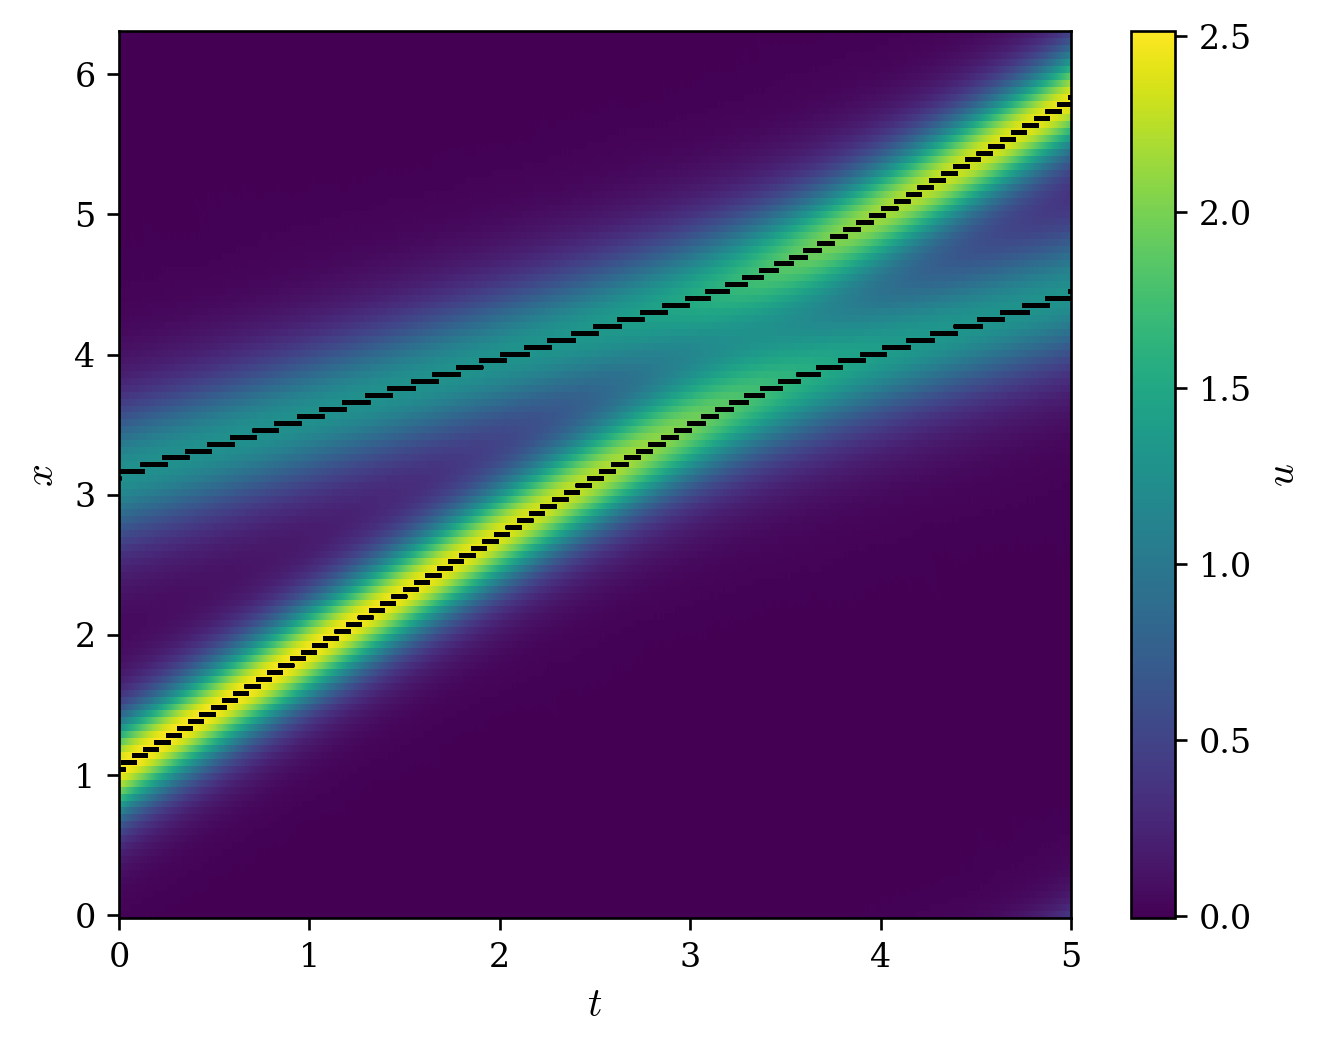

In [19]:
%matplotlib inline
peaks_t, peaks_x = track_peaks(u, height=0.8)
plt.figure()
plt.suptitle(
    r"$u(x, 0) = 3 v_1 \cosh^{-2} \left[ \sqrt{\frac{v_1}{4 \beta}} (x - x_1) \right]"
    r"+ 3 v_2 \cosh^{-2} \left[ \sqrt{\frac{v_2}{4 \beta}} (x  - x_2) \right]$"
)
plt.pcolormesh(t_grid, x_grid, u.T, shading="auto", cmap="viridis")
plt.plot(peaks_t, peaks_x, 'k.', ms=1)
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.colorbar(label="$u$")
plt.show()

In [20]:
v1 = 0.5 * L / tf  # Velocidad de la onda, dos vueltas en el tiempo integrado
x1 = L/2
v2 = 1.5 * L / tf
x2 = L/6
u = np.empty([nx, nt])  # Array con la velocidad
u[:, 0] = (  # CI: dos solitones del ejercicio
    3 * v1 * np.cosh(np.sqrt(v1 / (4 * beta)) * (x_vals - x1))**(-2)
    + 3 * v2 * np.cosh(np.sqrt(v2 / (4 * beta)) * (x_vals - x2))**(-2)
)
# Aplico el método de Euler para la integración temporal
for n in tqdm(range(nt - 1)):
    u[:, n+1] = evol(u[:, n], k_vals, beta, dt)

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100001 [00:00<?, ?it/s]

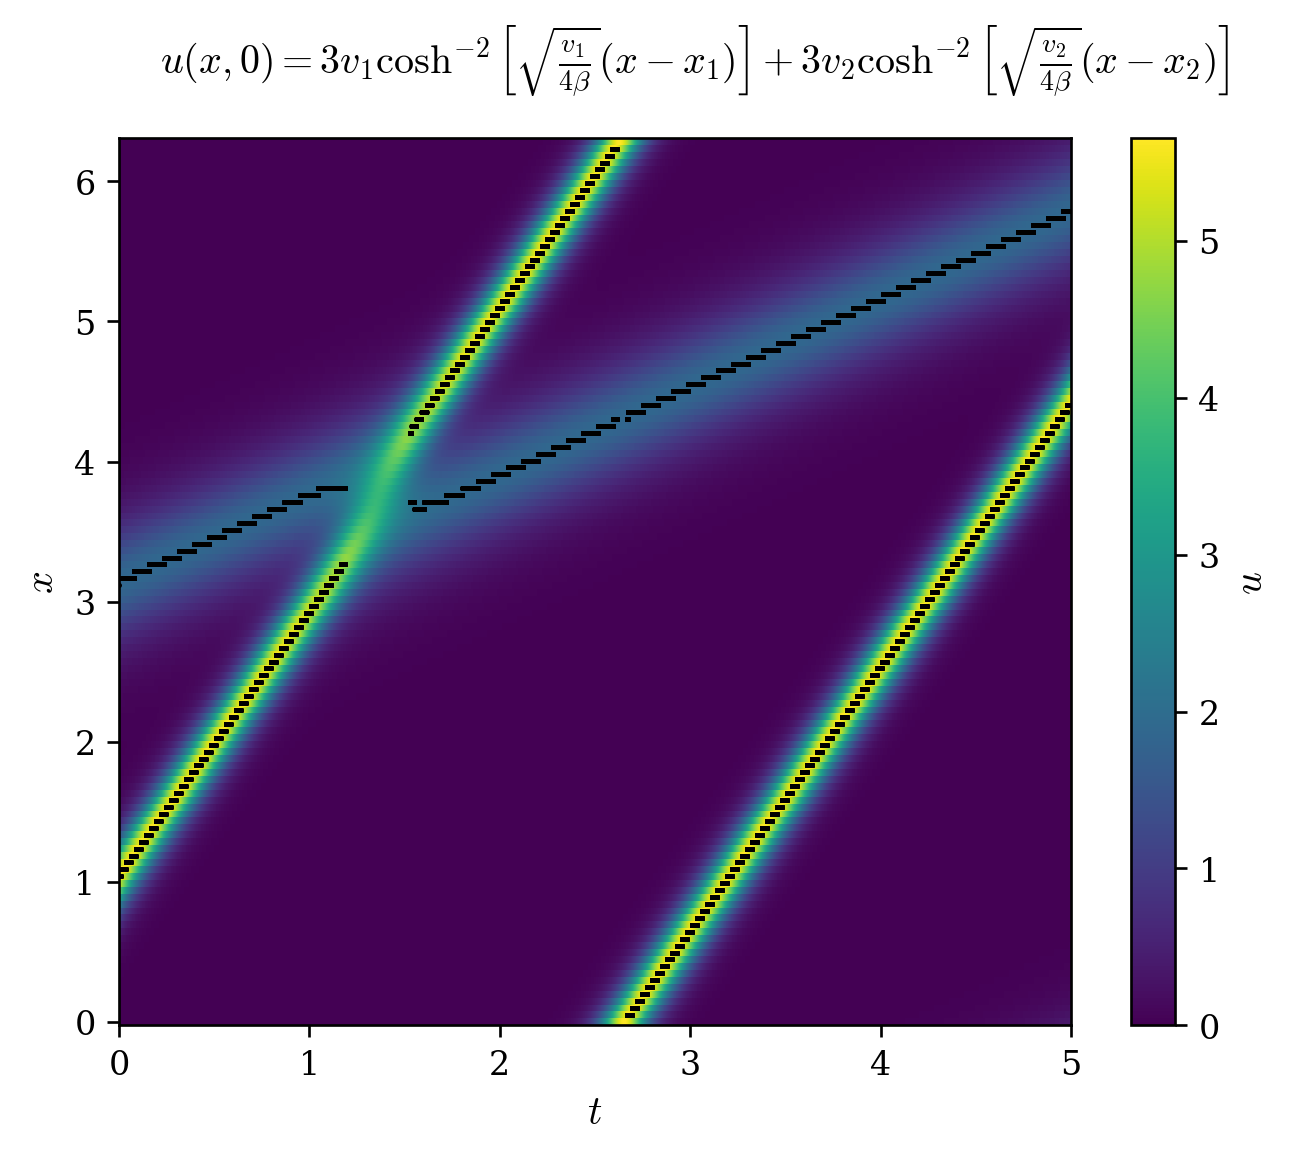

In [21]:
%matplotlib inline
peaks_t, peaks_x = track_peaks(u, height=0.8)
plt.figure()
plt.suptitle(
    r"$u(x, 0) = 3 v_1 \cosh^{-2} \left[ \sqrt{\frac{v_1}{4 \beta}} (x - x_1) \right]"
    r"+ 3 v_2 \cosh^{-2} \left[ \sqrt{\frac{v_2}{4 \beta}} (x  - x_2) \right]$"
)
plt.pcolormesh(t_grid, x_grid, u.T, shading="auto", cmap="viridis")
plt.plot(peaks_t, peaks_x, 'k.', ms=1)
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.colorbar(label="$u$")
plt.show()

In [ ]:
%matplotlib widget
fig, ax, v_cmap = plot_3d_evolution(x_vals, t_vals, u, cmap_name="viridis")
fig.set_label("Evolución de KdV mediante Método Pseudoespectral")

plt.show()

In [22]:
plt.close("all")

/tmp/ipykernel_8246/2166231710.py:15: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(


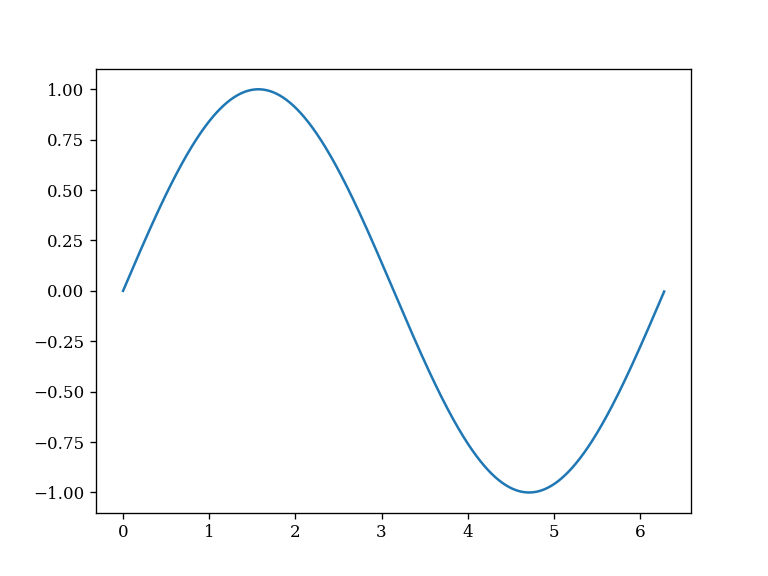

In [69]:
##Ejemplo de codigo para hacer animaciones, ver la documentación para más detalles
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,

%matplotlib widget
ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True)


plt.show()